# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Kenneth Wu, Arron Chang

**ID**: kcw53, ac2787

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

import Pkg
Pkg.activate(".")
Pkg.add("Plots")
Pkg.add("GraphRecipes")
Pkg.add("LaTeXStrings")
Pkg.instantiate()

  Activating new project at `/home2/kcw53/hw1-kennethwu35`
┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API /programs/julia-1.10.4/share/julia/stdlib/v1.10/Pkg/src/API.jl:1807
   Installed GR_jll ────────────── v0.73.5+0
   Installed ConcurrentUtilities ─ v2.4.1
   Installed StaticArraysCore ──── v1.4.2
   Installed OffsetArrays ──────── v1.14.0
   Installed IJulia ────────────── v1.24.2
   Installed StaticArrays ──────── v1.9.4
   Installed Xorg_libxcb_jll ───── v1.15.0+0
   Installed CodecZlib ─────────── v0.7.4
   Installed GLFW_jll ──────────── v3.3.9+0
   Installed TranscodingStreams ── v0.10.9
   Installed Conda ─────────────── v1.10.0
   Installed Plots ─────────────── v1.40.4
   Installed Extents ───────────── v0.1.2
   Installed ZMQ ───────────────── v1.2.5
   Installed XSLT_jll ──────────── v1.1.34+0
   Installed Construction

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.


**The logic behind this code is that it runs through each value within
the array and checks if it is smaller than the 'min_value'.
However, the error with this code is that the 'min_value' is defined
as 0 in the beginning, so this code will only work for values
less than 0. If all values are greater than 0, the returned value
will just be equal to 0.**

In [4]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


In [5]:
function minimum(array)
    min_value = array[1] #min_value starts at first value of array
    for i in 1:length(array)
        if array[i] < min_value #compares each value
            min_value = array[i] #replaces the min_value if smaller
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

**The logic behind this code is that it takes the mean of all
values inside an array. However, the error is that:**

**1. the class_average function is not called upon**

**2. the function tries to call upon the student_grades variable,
but that is not defined inside the function**

**3. average_grade is shown, but there is no average_grade
variable outside of the class_average function**

**4. mean function not defined (need to import Statistics library)**

In [7]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

LoadError: UndefVarError: `average_grade` not defined

In [8]:
using Statistics  #import Statistics library

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades) #call upon mean function
  return average_grade
end

@show class_average(student_grades)

class_average(student_grades) = 94.4


94.4

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

**The syntax error in this code is in defining the outcomes variable.
Using the zero function does not produce an array, but the zeros
function will do so.**

In [9]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

LoadError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

In [65]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials) #create an array of zeros
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11) #check if sum is 11 or more
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.36


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [11]:
function mystery_function(values)
    y = [] #create a new list
    for v in values
        if !(v in y) #checks if each value in input already appears in the list or not
            append!(y, v) #it will append the value to the new list if not already in it
        end
    end
    return y #returns the new list
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);
@show unique(list_of_values)

mystery_function(list_of_values) = Any[1, 2, 3, 4]
unique(list_of_values) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

**In this problem**:

-   Explain the purpose of `mystery_function`.

**The purpose of mystery_function is to return unique values within a list.
If there is a duplicate number or value inside the list, it will only
return the first time the number appears. Essentially, the duplicate
values that appear after the first time a value is listed will be removed.**

-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

**There is a built-in Julia function called unique(). I have used it
above as unique(list_of_values) and got the result [1, 2, 3, 4]**

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.


In [12]:
function compute_mean(v)
    sum = 0
    for i in 1:length(v)
        sum = sum + v[i] #compute sum of all values
    end
    return sum/length(v) #divides sum by number of values
end

random_vect = rand(10) #random vector of length 10
random_mean = compute_mean(random_vect) #computes mean of random vector
broadcast = random_vect .- random_mean #subtracts the computed mean from each value
@show compute_mean(broadcast)

compute_mean(broadcast) = 8.881784197001253e-17


8.881784197001253e-17

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

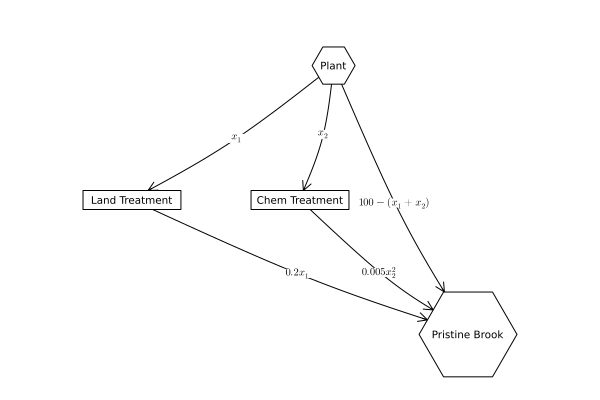

In [26]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"x_1", (1,3) => L"x_2", (1, 4) => L"100-(x_1+x_2)",(2, 4) => L"0.2x_1",(3, 4) => L"0.005x_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

(final_cost[i], final_concentration[i]) = (95.0, 0.15)
(final_cost[i], final_concentration[i]) = (110.0, 0.07)
(final_cost[i], final_concentration[i]) = (120.0, 0.145)
(final_cost[i], final_concentration[i]) = (155.0, 0.065)
(final_cost[i], final_concentration[i]) = (185.0, 0.13)
(final_cost[i], final_concentration[i]) = (240.0, 0.05)
(final_cost[i], final_concentration[i]) = (225.0, 0.185)
(final_cost[i], final_concentration[i]) = (290.0, 0.105)
(final_cost[i], final_concentration[i]) = (365.0, 0.025)
(final_cost[i], final_concentration[i]) = (350.0, 0.15)
(final_cost[i], final_concentration[i]) = (435.0, 0.07)
(final_cost[i], final_concentration[i]) = (420.0, 0.185)
(final_cost[i], final_concentration[i]) = (515.0, 0.105)


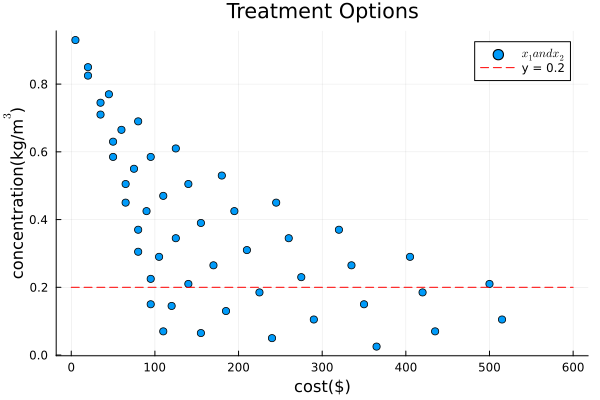

In [68]:
function treatment_type(x_1, x_2)
    wastewater_total = 100 #define parameters
    start_conc = 1

    massflow_1 = 0.2x_1*start_conc #Land Treatment equations and cost
    cost_1 = (x_1^2)/20

    massflow_2 = (1-0.005(x_2)^2)*start_conc #Chem Treatment equations and cost
    cost_2 = 1.5*x_2

    massflow_3 = wastewater_total-(x_1+x_2) #Remaining (disposal)

    final_conc = (massflow_1 + massflow_2 + massflow_3)/wastewater_total
    final_cost = cost_1 + cost_2

    return (final_conc, final_cost)
end



final_concentration = []
final_cost = []
for i = 1:10
    run = i*10 #generating values in increments of 10
    for i2 = 1:10
        run2 = 100-(i2*10)
        output = treatment_type(run,run2) #Calling the function and passing values
        if 0 < output[1]
            if output[1] < 1
                 append!(final_concentration, output[1]) #appending conc to tuple for graphing
                 append!(final_cost, output[2]) #appending cost to tuple for graphing
            end
        end
    end
end


for i = 1:length(final_concentration)
    if final_concentration[i] < 0.2 #showing cost and conc for concentrations below 0.2
        @show final_cost[i], final_concentration[i]
    end
end

#plotting scatter plot of cost and concentrations
scatter(final_cost, final_concentration, title="Treatment Options", label=L"x_1 and x_2")
xlabel!(L"cost($)")
ylabel!(L"concentration(kg/m$^3$)")

#y = 0.2 dashed red line
x=0:0.1:600
plot!(x, fill(0.2, length(x)), color="red", linestyle=:dash, label="y = 0.2")

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

**Depending on the values of x_1 and x_2, we wanted a way to visualize the final 
concentrations that are going into pristine brook as well as the associated cost. 
By using by using the given removal rates multiplied by the initial concentration, 
multiplied by่ our varying values for x_1 and x_2 we can find the mass flow rate into 
pristine brook. We then took the mass flow rates and divided them by the volume, 
which gave us the final concentrations. Similarly, the associated cost equations 
were multiplied by our varying x_1 and x_2 values, which we added at the end, giving
us our final cost.**


-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?


**We were able to find multiple points that satisfied the YUK
effluent standard. We plotted a dashed red line at y = 0.2.
The costs and concentrations were listed out in an array as follows:**

(Cost, Concentration)
(95.0, 0.15)
(110.0, 0.07)
(120.0, 0.145)
(155.0, 0.065)
(185.0, 0.13)
(240.0, 0.05)
(225.0, 0.185)
(290.0, 0.105)
(365.0, 0.025)
(350.0, 0.15)
(435.0, 0.07)
(420.0, 0.185)
(515.0, 0.105)

**The main trend between treatment cost and YUK concentration is
that for lower costs, there seems to be higher concentrations.
In order to find a better solution, looking at the points below
the red line, we can choose the prices that are the lowest costs**

Consulted En Lo for Question 4 on constructing functions for the types of treatment


### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.